# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

In [11]:
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f'{url}?q={city}&appid={weather_api_key}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | princeville
Processing Record 3 of Set 1 | stjordalshalsen
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | piacabucu
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | chak azam sahu
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | westport
Processing Record 13 of Set 1 | mount isa
Processing Record 14 of Set 1 | zolochiv
Processing Record 15 of Set 1 | uige
Processing Record 16 of Set 1 | enewetak
Processing Record 17 of Set 1 | fada
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | revda
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | olonkinbyen
Processing Record 23 of Set

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [18]:
import os
output_data_dir = "output_data"
if not os.path.exists(output_data_dir):
    os.makedirs(output_data_dir)

In [19]:
# Display sample data
city_data_df.sample(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
6,piacabucu,-10.4056,-36.4344,301.54,65,6,5.07,BR,1702407832
271,keflavik,64.0049,-22.5624,275.39,93,100,10.29,IS,1702407896
293,nieves,15.3274,120.9485,299.88,82,12,1.55,PH,1702407902
319,devils lake,48.1128,-98.8651,264.79,70,0,3.60,US,1702407700
127,borskoye,53.0333,51.7167,253.16,76,100,6.79,RU,1702407860


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv(f"{output_data_dir}/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv(f"{output_data_dir}/cities.csv", index_col="City_ID")
#city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,247.59,75,0,7.00,RU,1702407831
1,princeville,45.7668,-61.2985,276.29,73,20,6.17,CA,1702407831
2,stjordalshalsen,63.4681,10.9262,267.55,86,0,4.12,NO,1702407831
3,ilulissat,69.2167,-51.1000,262.44,89,100,2.48,GL,1702407831
4,punta arenas,-53.1500,-70.9167,285.16,58,75,13.89,CL,1702407688


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

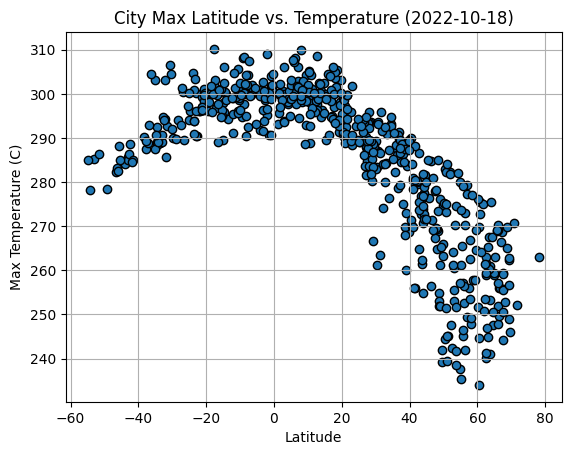

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig(f"{output_data_dir}/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

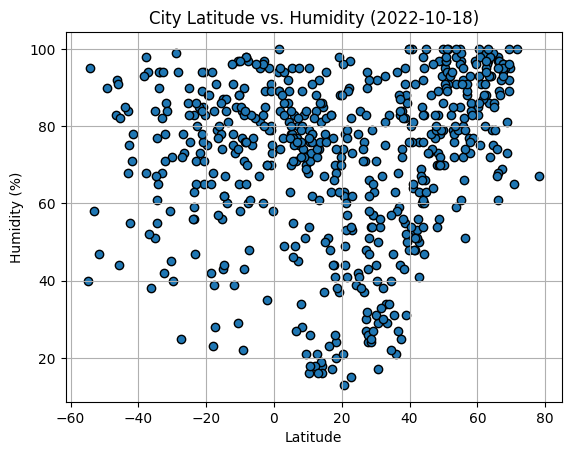

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

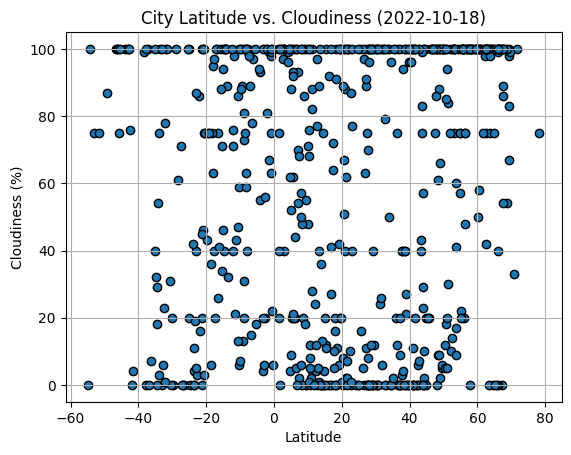

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

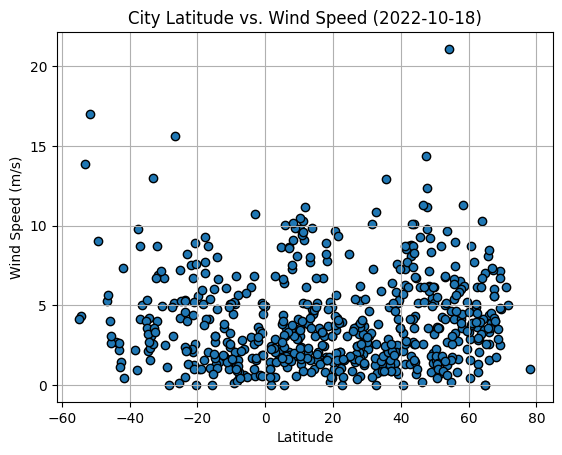

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
     # Get regression values
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values, marker="o", edgecolors="black")
    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    # Annotate the text with the linear equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(title.split(" vs.")[0])
    plt.legend()
    # Display r-value
    print(f"The r-value is: {rvalue**2}")
    # Show plot
    plt.show()

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7455101770784726


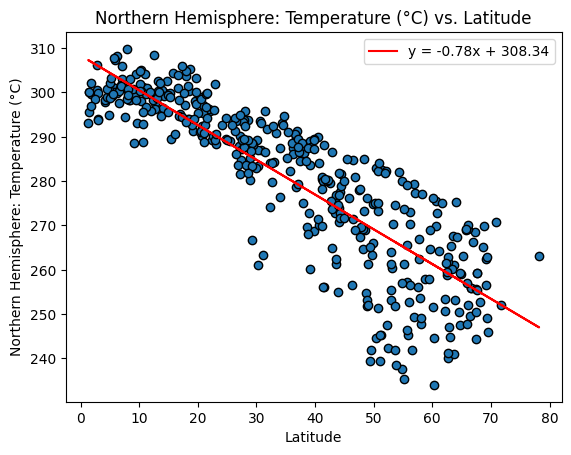

In [29]:
# Linear regression on Northern Hemisphere
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Northern Hemisphere: Temperature (°C) vs. Latitude", (0, -20))

The r-value is: 0.44528696139389273


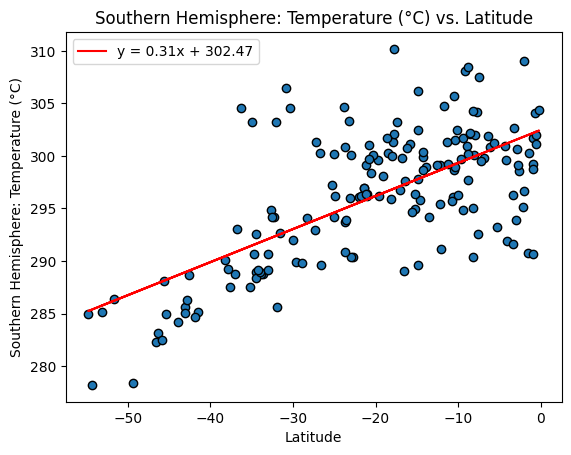

In [30]:
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Southern Hemisphere: Temperature (°C) vs. Latitude", (-55, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1215456469918481


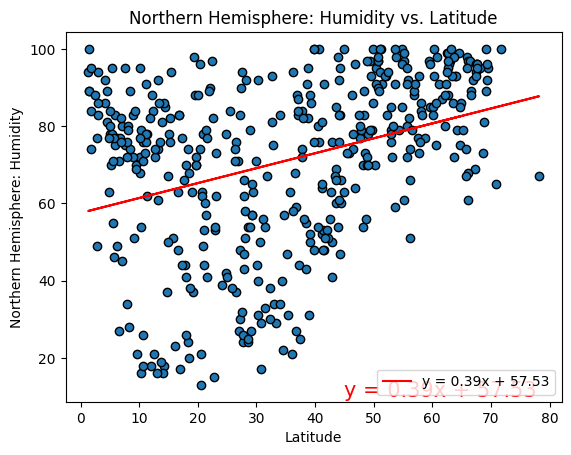

In [33]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Northern Hemisphere: Humidity vs. Latitude", (45, 10))

The r-value is: 0.0056855679739187415


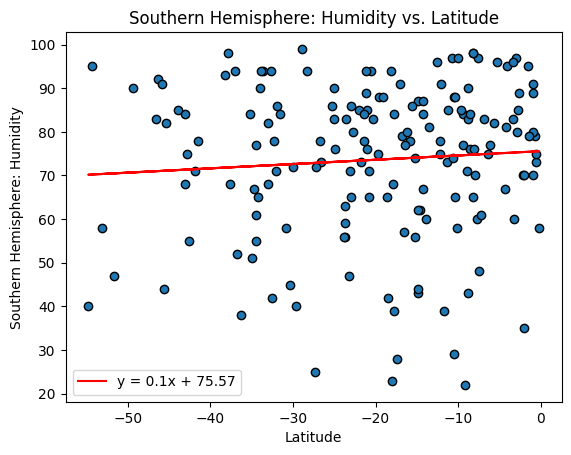

In [34]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Southern Hemisphere: Humidity vs. Latitude", (-55, 15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05859683499178862


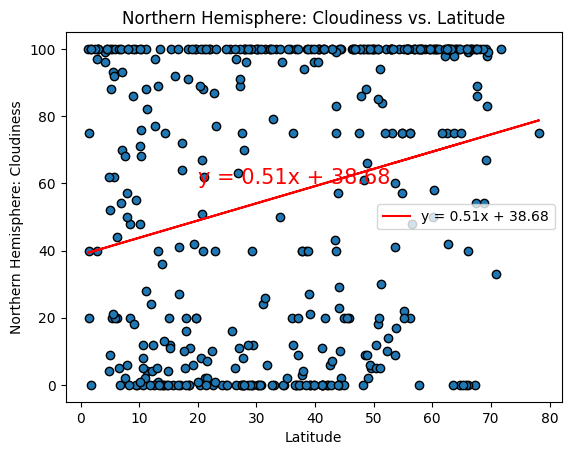

In [35]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Northern Hemisphere: Cloudiness vs. Latitude", (20, 60))

The r-value is: 0.009795803194313937


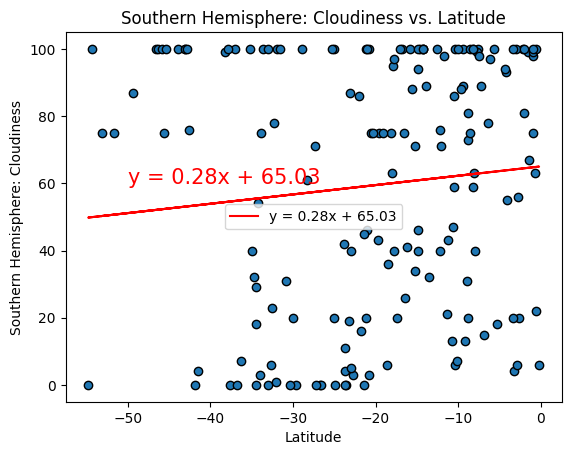

In [37]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Southern Hemisphere: Cloudiness vs. Latitude", (-50, 60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01460371997668304


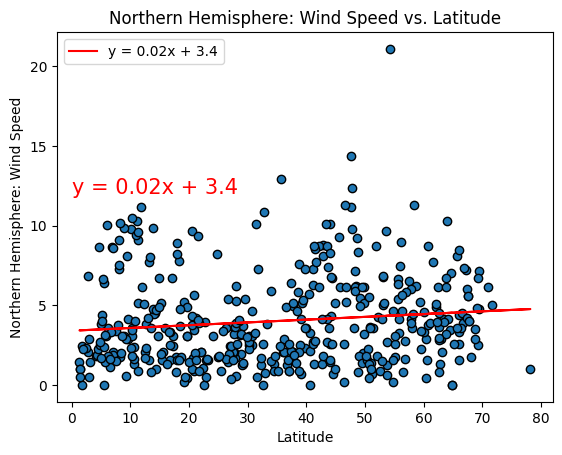

In [38]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Northern Hemisphere: Wind Speed vs. Latitude", (0, 12))

The r-value is: 0.0807024874084278


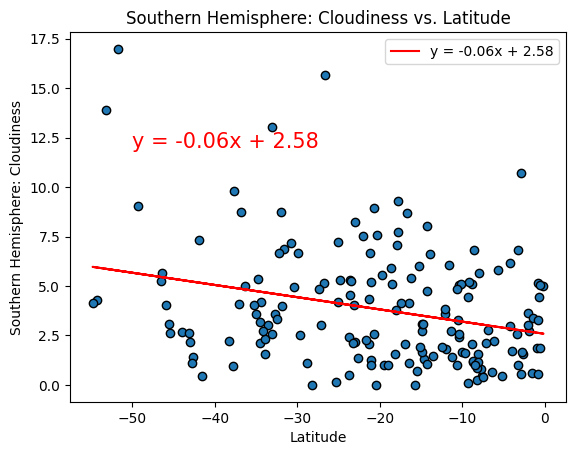

In [39]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Southern Hemisphere: Cloudiness vs. Latitude", (-50, 12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE